In [1]:
import pandas as pd
import numpy as np
import os, glob
import pickle
import matplotlib.pyplot as plt
#import seaborn as sns
import datetime as dt

# 7.6 Capstone Two: Data Wrangling

### Load the data

In [2]:
## Hourly Energy Demand and Weather
file_list = glob.glob('data_raw/HourlyEnergyDemandWeather/*.csv')
file_list

['data_raw/HourlyEnergyDemandWeather/energy_dataset.csv',
 'data_raw/HourlyEnergyDemandWeather/weather_features.csv']

In [3]:
energy_data= pd.read_csv(file_list[0])
weather_feat = pd.read_csv(file_list[1])

In [4]:
display(energy_data.head(5).T)
display(weather_feat.head(5).T)

,0,1,2,3,4
time,2015-01-01 00:00:00+01:00,2015-01-01 01:00:00+01:00,2015-01-01 02:00:00+01:00,2015-01-01 03:00:00+01:00,2015-01-01 04:00:00+01:00
generation biomass,447.0,449.0,448.0,438.0,428.0
generation fossil brown coal/lignite,329.0,328.0,323.0,254.0,187.0
generation fossil coal-derived gas,0.0,0.0,0.0,0.0,0.0
generation fossil gas,4844.0,5196.0,4857.0,4314.0,4130.0
generation fossil hard coal,4821.0,4755.0,4581.0,4131.0,3840.0
generation fossil oil,162.0,158.0,157.0,160.0,156.0
generation fossil oil shale,0.0,0.0,0.0,0.0,0.0
generation fossil peat,0.0,0.0,0.0,0.0,0.0
generation geothermal,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4
dt_iso,2015-01-01 00:00:00+01:00,2015-01-01 01:00:00+01:00,2015-01-01 02:00:00+01:00,2015-01-01 03:00:00+01:00,2015-01-01 04:00:00+01:00
city_name,Valencia,Valencia,Valencia,Valencia,Valencia
temp,270.475,270.475,269.686,269.686,269.686
temp_min,270.475,270.475,269.686,269.686,269.686
temp_max,270.475,270.475,269.686,269.686,269.686
pressure,1001,1001,1002,1002,1002
humidity,77,77,78,78,78
wind_speed,1,1,0,0,0
wind_deg,62,62,23,23,23
rain_1h,0.0,0.0,0.0,0.0,0.0


In [5]:
display(energy_data.info())
display(weather_feat.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

None

In [6]:
display(energy_data.describe().T)  # it has NaN, and the redundant features (columns)
display(weather_feat.describe().T) # no missing values

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil coal-derived gas,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation fossil oil shale,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil peat,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation geothermal,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation hydro pumped storage aggregated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
temp,178396.0,289.618605,8.026199,262.24,283.670000,289.15,295.150000,315.600
temp_min,178396.0,288.330442,7.955491,262.24,282.483602,288.15,293.730125,315.150
temp_max,178396.0,291.091267,8.612454,262.24,284.650000,290.15,297.150000,321.150
pressure,178396.0,1069.260740,5969.631893,0.00,1013.000000,1018.00,1022.000000,1008371.000
humidity,178396.0,68.423457,21.902888,0.00,53.000000,72.00,87.000000,100.000
wind_speed,178396.0,2.470560,2.095910,0.00,1.000000,2.00,4.000000,133.000
wind_deg,178396.0,166.591190,116.611927,0.00,55.000000,177.00,270.000000,360.000
rain_1h,178396.0,0.075492,0.398847,0.00,0.000000,0.00,0.000000,12.000
rain_3h,178396.0,0.000380,0.007288,0.00,0.000000,0.00,0.000000,2.315
snow_3h,178396.0,0.004763,0.222604,0.00,0.000000,0.00,0.000000,21.500


**What to do next?**
* `energy_data` has many redundant features (columns), and NaN entries.
* `weather_feat` has categorical type features. No missing entries.
* Both `energy_data` and `weather_feat` have **datetime** feature.

### Number of Missing Values by Column

In [7]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 'energy_data'
#Order them (increasing or decreasing) using sort_values
missing = pd.concat(
    [energy_data.isnull().sum(), 100 * energy_data.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by=['count'], ascending=False)

,count,%
generation hydro pumped storage aggregated,35064,100.000000
forecast wind offshore eday ahead,35064,100.000000
total load actual,36,0.102669
generation waste,19,0.054187
generation biomass,19,0.054187
generation hydro pumped storage consumption,19,0.054187
generation marine,19,0.054187
generation hydro run-of-river and poundage,19,0.054187
generation fossil oil,19,0.054187
generation fossil peat,18,0.051335


In [8]:
#Count the number of missing or zero values in each column of 'energy_data'
col_filter = (energy_data.isnull() | (energy_data == 0))

zero_or_missing = pd.concat([col_filter.sum(), 100 * col_filter.mean()], axis=1)
zero_or_missing.columns = ['count', '%']
zero_or_missing.sort_values(by=['count'], ascending=False)

,count,%
generation marine,35064,100.000000
generation fossil coal-derived gas,35064,100.000000
forecast wind offshore eday ahead,35064,100.000000
generation wind offshore,35064,100.000000
generation fossil oil shale,35064,100.000000
generation fossil peat,35064,100.000000
generation geothermal,35064,100.000000
generation hydro pumped storage aggregated,35064,100.000000
generation hydro pumped storage consumption,12626,36.008442
generation fossil brown coal/lignite,10535,30.045060


#### Drop the Top 8 Redundant Features (columns) of  `energy_data`

In [9]:
##'energy_data': what are the redundant features (columns)?
## Find the columns that are all 0 (or NaN)
energy_data.columns[col_filter.sum(axis=0) == 35064]

Index(['generation fossil coal-derived gas', 'generation fossil oil shale',
       'generation fossil peat', 'generation geothermal',
       'generation hydro pumped storage aggregated', 'generation marine',
       'generation wind offshore', 'forecast wind offshore eday ahead'],
      dtype='object')

In [10]:
col_to_drop = [
    'generation fossil coal-derived gas', 'generation fossil oil shale',
    'generation fossil peat', 'generation geothermal',
    'generation hydro pumped storage aggregated', 'generation marine',
    'generation wind offshore', 'forecast wind offshore eday ahead'
]

energy_data.drop(columns=col_to_drop, inplace=True)
energy_data.shape # Check dataset size

(35064, 21)

### Categorical Features

In [11]:
energy_data.select_dtypes('object').head(5)

,time
0,2015-01-01 00:00:00+01:00
1,2015-01-01 01:00:00+01:00
2,2015-01-01 02:00:00+01:00
3,2015-01-01 03:00:00+01:00
4,2015-01-01 04:00:00+01:00


In [12]:
weather_feat.select_dtypes('object').head(5)

,dt_iso,city_name,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,clear,sky is clear,01n


In [13]:
##Set datetime (in 'CET' timezone)
energy_data['time'] = pd.to_datetime(energy_data['time'],
                                     errors='coerce',
                                     infer_datetime_format=True,
                                     utc=True).dt.tz_convert('CET')

weather_feat['dt_iso'] = pd.to_datetime(weather_feat['dt_iso'],
                                        errors='coerce',
                                        infer_datetime_format=True,
                                        utc=True).dt.tz_convert('CET')

In [14]:
##'weather_feat': set features with categorical type
cate_col = ['city_name', 'weather_main', 'weather_description', 'weather_icon', 'weather_id']
weather_feat[cate_col] = weather_feat[cate_col].astype("category")

In [15]:
##Clean the white space in 'city_name'
weather_feat['city_name'] = weather_feat['city_name'].str.strip()
weather_feat['city_name'].value_counts()

Madrid       36267
Bilbao       35951
Seville      35557
Barcelona    35476
Valencia     35145
Name: city_name, dtype: int64

* **How to process the categorical features? Shall we reassign those whose count is 1?**

In [16]:
weather_feat['weather_main'] #= weather_feat['weather_main'].str.strip()
weather_feat['weather_description'].value_counts()

sky is clear                    82685
few clouds                      32101
broken clouds                   17448
scattered clouds                15945
light rain                      10905
mist                             3908
moderate rain                    3621
overcast clouds                  2561
fog                              2506
light intensity drizzle          1241
heavy intensity rain             1142
light intensity shower rain       657
proximity thunderstorm            480
proximity shower rain             476
haze                              435
shower rain                       426
drizzle                           369
dust                              345
thunderstorm                      309
light snow                        140
thunderstorm with rain            127
thunderstorm with light rain       92
heavy intensity shower rain        81
light intensity drizzle rain       79
very heavy rain                    78
snow                               74
smoke       

In [17]:
#['ragged shower rain', 'very heavy rain']
energy_data = energy_data.set_index('time').sort_index()
weather_feat = weather_feat.set_index('dt_iso').sort_index()

### Numeric Features

#### Numeric data summary

In [18]:
display(energy_data.describe().T)  # need to deal with NaN !!!
display(weather_feat.describe().T) # no missing values

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35045.0,475.577343,792.406614,0.00,0.0000,68.00,616.00,4523.00
generation hydro run-of-river and poundage,35045.0,972.116108,400.777536,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35046.0,2605.114735,1835.199745,0.00,1077.2500,2164.00,3757.00,9728.00
generation nuclear,35047.0,6263.907039,839.667958,0.00,5760.0000,6566.00,7025.00,7117.00
generation other,35046.0,60.228585,20.238381,0.00,53.0000,57.00,80.00,106.00


,count,mean,std,min,25%,50%,75%,max
temp,178396.0,289.618605,8.026199,262.24,283.670000,289.15,295.150000,315.600
temp_min,178396.0,288.330442,7.955491,262.24,282.483602,288.15,293.730125,315.150
temp_max,178396.0,291.091267,8.612454,262.24,284.650000,290.15,297.150000,321.150
pressure,178396.0,1069.260740,5969.631893,0.00,1013.000000,1018.00,1022.000000,1008371.000
humidity,178396.0,68.423457,21.902888,0.00,53.000000,72.00,87.000000,100.000
wind_speed,178396.0,2.470560,2.095910,0.00,1.000000,2.00,4.000000,133.000
wind_deg,178396.0,166.591190,116.611927,0.00,55.000000,177.00,270.000000,360.000
rain_1h,178396.0,0.075492,0.398847,0.00,0.000000,0.00,0.000000,12.000
rain_3h,178396.0,0.000380,0.007288,0.00,0.000000,0.00,0.000000,2.315
snow_3h,178396.0,0.004763,0.222604,0.00,0.000000,0.00,0.000000,21.500


#### Distributions of Feature Values

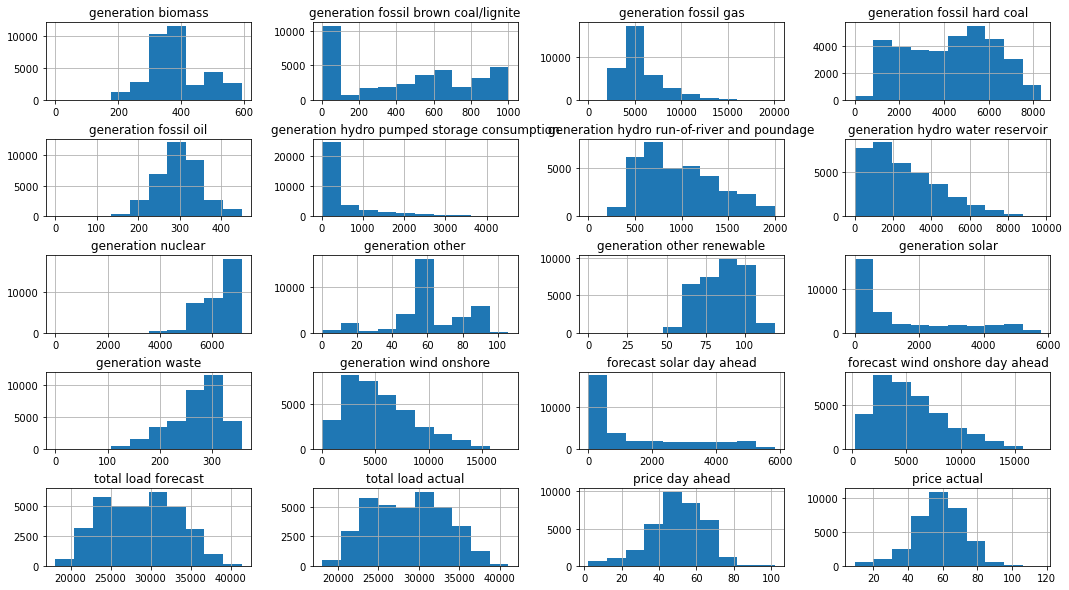

In [19]:
energy_data.hist(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5);
plt.show()

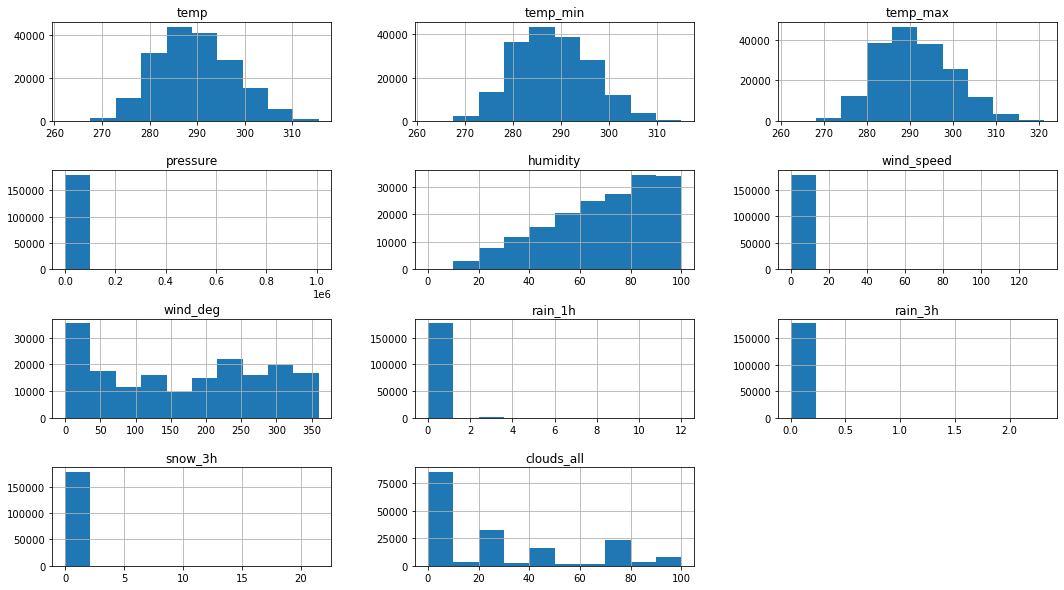

In [20]:
weather_feat.hist(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5);
plt.show()

#### Imputing missing values of `energy_data`

In [65]:
##'energy_data': Check the observations that have any NaN attribute
energy_data.loc[energy_data.isna().sum(axis=1)>0,:].T

time,2015-01-05 03:00:00+01:00,2015-01-05 12:00:00+01:00,2015-01-05 13:00:00+01:00,2015-01-05 14:00:00+01:00,2015-01-05 15:00:00+01:00,2015-01-05 16:00:00+01:00,2015-01-05 17:00:00+01:00,2015-01-19 19:00:00+01:00,2015-01-19 20:00:00+01:00,2015-01-27 19:00:00+01:00,...,2016-06-12 01:00:00+02:00,2016-07-09 22:00:00+02:00,2016-07-12 00:00:00+02:00,2016-09-28 09:00:00+02:00,2016-10-27 23:00:00+02:00,2016-11-23 04:00:00+01:00,2017-11-14 12:00:00+01:00,2017-11-14 19:00:00+01:00,2018-06-11 18:00:00+02:00,2018-07-11 09:00:00+02:00
generation biomass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,356.00,NaN,346.00,347.00,351.00,NaN,0.00,0.00,331.00,NaN
generation fossil brown coal/lignite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,595.00,NaN,595.00,594.00,554.00,900.00,0.00,0.00,506.00,NaN
generation fossil gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5719.00,NaN,5951.00,5522.00,7176.00,4838.00,10064.00,12336.00,7538.00,NaN
generation fossil hard coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6165.00,NaN,6131.00,6272.00,5690.00,4547.00,0.00,0.00,5360.00,NaN
generation fossil oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,274.00,NaN,NaN,292.00,321.00,269.00,0.00,0.00,300.00,NaN
generation hydro pumped storage consumption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,382.00,NaN,494.00,0.00,NaN,1413.00,0.00,0.00,1.00,NaN
generation hydro run-of-river and poundage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,709.00,524.00,417.00,795.00,0.00,0.00,1134.00,NaN
generation hydro water reservoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1325.00,NaN,1215.00,2494.00,1295.00,435.00,0.00,0.00,4258.00,NaN
generation nuclear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5056.00,6923.00,5058.00,6997.00,6967.00,5040.00,0.00,0.00,5856.00,NaN
generation other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.00,NaN,49.00,61.00,58.00,60.00,0.00,0.00,52.00,NaN


In [66]:
##[Option 1] Fill NaN with last valid observation (forward-fill).
#energy_data_ffill = energy_data.fillna(method='ffill')

##[Option 2] Fill NaN using an interpolation method.
energy_data_interp = energy_data.interpolate(method='linear',
                                             limit_direction='forward',
                                             axis=0)

### Check the data info, and savefile

In [14]:
##Check the data info
display(energy_data_interp.describe().T)
display(energy_data_interp.info())

,count,mean,std,min,25%,50%,75%,max
generation biomass,35064.0,383.531343,85.346266,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35064.0,448.094570,354.618269,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35064.0,5622.700647,2201.510984,0.00,4126.0000,4969.50,6429.00,20034.00
generation fossil hard coal,35064.0,4256.531271,1961.988937,0.00,2527.0000,4475.00,5839.00,8359.00
generation fossil oil,35064.0,298.342417,52.519927,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35064.0,475.582706,792.312704,0.00,0.0000,68.00,616.00,4523.00
generation hydro run-of-river and poundage,35064.0,972.201902,400.712304,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35064.0,2605.534123,1835.175078,0.00,1078.0000,2165.00,3758.00,9728.00
generation nuclear,35064.0,6263.483430,840.272333,0.00,5759.0000,6564.00,7025.00,7117.00
generation other,35064.0,60.226030,20.238792,0.00,53.0000,57.00,80.00,106.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation hydro pumped storage consumption  35064 non-null  float64
 7   generation hydro run-of-river and poundage   35064 non-null  float64
 8   generation hydro water reservoir             35064 non-null  float64
 9   generation nuclear                           35064 non-null  float64
 10

None

In [15]:
display(weather_feat.describe().T) 
display(weather_feat.info()) 

,count,mean,std,min,25%,50%,75%,max
temp,178396.0,289.618605,8.026199,262.24,283.670000,289.15,295.150000,315.600
temp_min,178396.0,288.330442,7.955491,262.24,282.483602,288.15,293.730125,315.150
temp_max,178396.0,291.091267,8.612454,262.24,284.650000,290.15,297.150000,321.150
pressure,178396.0,1069.260740,5969.631893,0.00,1013.000000,1018.00,1022.000000,1008371.000
humidity,178396.0,68.423457,21.902888,0.00,53.000000,72.00,87.000000,100.000
wind_speed,178396.0,2.470560,2.095910,0.00,1.000000,2.00,4.000000,133.000
wind_deg,178396.0,166.591190,116.611927,0.00,55.000000,177.00,270.000000,360.000
rain_1h,178396.0,0.075492,0.398847,0.00,0.000000,0.00,0.000000,12.000
rain_3h,178396.0,0.000380,0.007288,0.00,0.000000,0.00,0.000000,2.315
snow_3h,178396.0,0.004763,0.222604,0.00,0.000000,0.00,0.000000,21.500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dt_iso               178396 non-null  object  
 1   city_name            178396 non-null  category
 2   temp                 178396 non-null  float64 
 3   temp_min             178396 non-null  float64 
 4   temp_max             178396 non-null  float64 
 5   pressure             178396 non-null  int64   
 6   humidity             178396 non-null  int64   
 7   wind_speed           178396 non-null  int64   
 8   wind_deg             178396 non-null  int64   
 9   rain_1h              178396 non-null  float64 
 10  rain_3h              178396 non-null  float64 
 11  snow_3h              178396 non-null  float64 
 12  clouds_all           178396 non-null  int64   
 13  weather_id           178396 non-null  category
 14  weather_main         178396 non-null  category
 15  

None

In [16]:
df_E = energy_data_interp
df_W = weather_feat

In [19]:
# df_E.to_pickle("data/energy.pkl")
# df_W.to_pickle("data/weather.pkl")